In [2]:
import numpy as np
import pandas as pd
import scipy
#How can you remove duplicate values in a dataset in Python?

# I can think of 3 ways to do that:
#1
my_array = np.array([1, 2, 2, 4, 5])
np.unique(my_array)

array([1, 2, 4, 5])

In [31]:
#2
df = pd.DataFrame(
    {
        "customer_id": ["A", "B", "C","C"],
        "date": ["5/1/2017", "5/8/2017", "5/11/2017","5/12/2017"],
        "spend": [10, 5, 20,30]
    },
    #index = [1, 2, 3, 4],
    columns = ["customer_id", "date", "spend"]
)
result=df.groupby(["customer_id"])["spend"].sum()
result
#!Question: I have to add a aggregate function like sum(). However in SQL it is not necessary.Is there anyway I could drop it?
#!Question: I also try to do result["customer_id"] but that would not work. 

customer_id
A    10
B     5
C    50
Name: spend, dtype: int64

In [ ]:
#3 Use drop duplicate. You will see it in the next answer. 

In [32]:
#You are given two tables - friend_request and request_accepted.
#Friend_request contains requester_id, time and sent_to_id and
#request_accepted table contains time, acceptor_id and
#requestor_id. How will you determine the overall acceptance rate
#of requests? 


Friend_request = pd.DataFrame(
    {
        "Requester_id": ["A", "B", "C","C","C"],
        "time": ["5/1/2017", "5/8/2017", "5/11/2017","5/12/2017","5/13/2017"],
        "send_to_id": ["D", "E", "A","F","F"]
    },
 
)

request_accepted = pd.DataFrame(
    {
        "acceptor_id": ["D", "E", "F","C"],
        "time": ["5/12/2017", "5/9/2017", "5/13/2017","5/14/2017"],
        "Requester_id": ["A", "B", "C","C"]
    },

)
#For those who sent multiple friend requests to the same person, we ocnsider that as one request.
Unique_FR=Friend_request.drop_duplicates(subset=["Requester_id", "send_to_id"], keep='first')

rate=pd.merge(Unique_FR,request_accepted,how='left',left_on=('Requester_id','send_to_id'),right_on=('Requester_id','acceptor_id'))
rate


,Requester_id,send_to_id,time_x,acceptor_id,time_y
0,A,D,5/1/2017,D,5/12/2017
1,B,E,5/8/2017,E,5/9/2017
2,C,A,5/11/2017,NaN,NaN
3,C,F,5/12/2017,F,5/13/2017


In [73]:
#acceptance rate of requests
1-(rate['acceptor_id'].isnull().sum()/len(rate))

0.75

In [33]:
SELECT Requester_id,send_to_id 
into #temp 
from Friend_request
group by Requester_id,send_to_id

SELECT count(*) Total 
,sum(case when b.acceptor_id is null then 0 else 1 end) count_accept 
,sum(case when b.acceptor_id is null then 0 else 1 end)/count(*) rate
, from #temp a 
left join request_accepted b
on a.Requester_id=b.Requester_id
and a.send_to_id =b.acceptor_id


SyntaxError: invalid syntax (<ipython-input-33-edaaf4ebad84>, line 1)

In [106]:
#Homework 3
cc='4175004175004172'
if cc[0:2]=='34' or'37' and len(cc)==15 :print('AMEX')
if cc[0:2]=='36' and len(cc)==14 :print('Dinner Club')
if cc[0:1]=="4" and len(cc)==16:    
    if cc[0:4]=='4026':
         print('VISAELECTRON')
    if cc[0:4]=='4405':
         print('VISAELECTRON') 
    if cc[0:4]=='4508':
         print('VISAELECTRON') 
    if cc[0:4]=='4844':
         print('VISAELECTRON') 
    if cc[0:4]=='4913':
         print('VISAELECTRON')
    if cc[0:4]=='4917':
         print('VISAELECTRON') 
    if cc[0:6]=='417500':
         print('VISAELECTRON') 
    else:
         print('VISA')
            
#!Question: How to make the credit card input an array? 

VISAELECTRON


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [59]:
file_location='C:/Users/yzhang/Desktop/bittiger/'
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)
my_data .head(5)



,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [60]:
my_data .date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data .head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [82]:
# for any given experiment_id, return a list group by date
def GetSeries(my_data , my_id,country, vertical):
    table = my_data [["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country== country)&(my_data.vertical== vertical)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))


In [83]:
# test if this works
blue = GetSeries(my_data , 12624548,'JP','ANDROID_APPS')
blue

(date
 2017-04-01     36116.466827
 2017-04-02     51252.864380
 2017-04-03     68230.835478
 2017-04-04     77689.894759
 2017-04-05     94314.111609
 2017-04-06    105100.447679
 2017-04-07    118077.056709
 Name: spend_usd, dtype: float64, 118077.05670900008)

In [84]:
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country,vertical)
    index_series = np.unique(my_data.date) 
    index_series = np.sort(index_series) 
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0], country,vertical)[0]
    control_series = GetSeries(my_data, experiment_ids[1], country,vertical)[0]
    treatment_revenue = GetSeries(my_data, experiment_ids[0], country,vertical)[1]
    control_revenue = GetSeries(my_data, experiment_ids[1], country,vertical)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)

Cumulative revenue impact: -4.35272685442834%


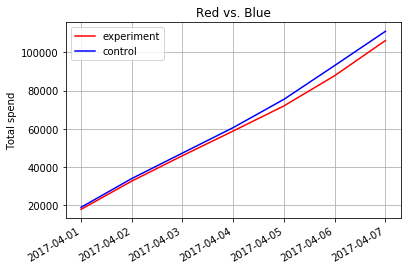

In [85]:

PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US",'ANDROID_APPS')